<a href="https://colab.research.google.com/github/MuniraAguiar/ia-grafos-Munira/blob/main/LIsta_N2_Inteligencia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lista de Exercícios N2**

Tema: Grafos e Algoritmos de Busca (Dijkstra, A*, em-ordem, pré-ordem e pós-ordem)

Disciplina: Inteligência Artificial\
Ambiente: Google Colab\
Entrega: via repositório individual no GitHub

**Nome completo:** Munira Vieira de Aguiar

**Matricula:** 2402291

**Regras Gerais**

- Trabalho individual.

- Linguagem: Python 3 (Google Colab).

- É permitido usar: heapq, numpy, matplotlib, dataclasses.

- Proibido usar funções prontas de shortest path (networkx.shortest_path, scipy.sparse.csgraph.dijkstra, etc.).

O Notebook (.ipynb) deve conter:

- Identificação (nome, turma, link do GitHub)

- Código, testes e reflexões

- Seções organizadas conforme o roteiro abaixo.

**Parte A — Dijkstra (Caminho Mínimo em Grafos Ponderados Positivos)**

> Imagine que você está projetando um sistema de navegação para ambulâncias em uma cidade. Cada interseção é representada como um nó e cada rua como uma aresta ponderada com o tempo médio de deslocamento. Você precisa encontrar a rota mais rápida entre o hospital e o local de atendimento, garantindo que o caminho tenha custo mínimo e seja correto mesmo em grandes redes urbanas.

**Atividades**

- Implemente o algoritmo de Dijkstra, retornando o custo mínimo (dist) e os predecessores (parent).

- Crie uma função reconstruct_path(parent, target) que reconstrua o trajeto.

Teste o algoritmo em um grafo de exemplo.

**Explique (Questões Discursivas):**

1. Por que Dijkstra exige arestas não negativas?

O algoritmo de Dijkstra assume que, ao encontrar o menor caminho para um nó, esse valor não será mais alterado. Se houver arestas com pesos negativos, essa suposição falha, pois um caminho mais curto pode surgir posteriormente. Isso compromete a corretude do algoritmo.

2. Qual a complexidade do algoritmo com lista de adjacência e heapq?

A complexidade é O((V + E) log V), onde V é o número de vértices e E o número de arestas. Isso se deve ao uso da fila de prioridade heapq que permite acesso eficiente ao próximo nó com menor custo.

💡 Dica: Compare seu resultado com um mapa simples — se mudar o peso de uma rua, a rota muda?

In [4]:
import heapq

def dijkstra(graph, start):
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    parent = {node: None for node in graph}

    heap = [(0, start)]

    while heap:
        current_dist, current_node = heapq.heappop(heap)

        if current_dist > dist[current_node]:
            continue

        for neighbor, weight in graph[current_node]:
            distance = current_dist + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                parent[neighbor] = current_node
                heapq.heappush(heap, (distance, neighbor))

    return dist, parent

def reconstruct_path(parent, target):
    path = []
    while target is not None:
        path.append(target)
        target = parent[target]
    return path[::-1]

graph = {
    'Hospital': [('A', 4), ('B', 2)],
    'A': [('C', 3)],
    'B': [('A', 1), ('D', 5)],
    'C': [('Local', 4)],
    'D': [('C', 1), ('Local', 7)],
    'Local': []
}

dist, parent = dijkstra(graph, 'Hospital')
path = reconstruct_path(parent, 'Local')

print("Custo mínimo até o Local:", dist['Local'])
print("Caminho reconstruído:", path)

Custo mínimo até o Local: 10
Caminho reconstruído: ['Hospital', 'B', 'A', 'C', 'Local']


**Parte B — A-Star (Busca Informada com Heurística Admissível)**

> Agora, considere um robô autônomo que deve se deslocar por um labirinto 2D, evitando obstáculos e chegando ao destino no menor tempo possível.
Diferente do Dijkstra, o robô pode usar uma heurística (como a distância ao alvo) para priorizar rotas promissoras, economizando tempo de busca.

**Atividades**

1. Gere um grid 20x20 com ~15% de obstáculos aleatórios.

2. Implemente a função heuristic(a, b) (distância Manhattan).

3. Desenvolva o algoritmo a_star(grid, start, goal, h) e teste-o.

**Explique (Questões Discursivas):**

1. A* vs Dijkstra: qual expande menos nós?

O A* geralmente expande menos nós que o Dijkstra, pois utiliza uma heurística para guiar a busca em direção ao objetivo, evitando explorar caminhos menos promissores.

2. Por que a heurística Manhattan é admissível nesse caso?

A heurística Manhattan é admissível porque nunca superestima o custo real. Ela considera apenas movimentos horizontais e verticais, que são os únicos permitidos no grid, garantindo que o A* encontre o caminho ótimo.

💡 Cenário real: O A* é amplamente usado em robôs aspiradores, drones e jogos. Seu desafio é aplicar o mesmo raciocínio.

Menores distâncias a partir do nó 'A':
 - Até A: 0
 - Até B: 2
 - Até C: 3
 - Até D: 5

Caminhos mínimos:
 - A → B: A -> B
 - A → C: A -> B -> C
 - A → D: A -> B -> C -> D


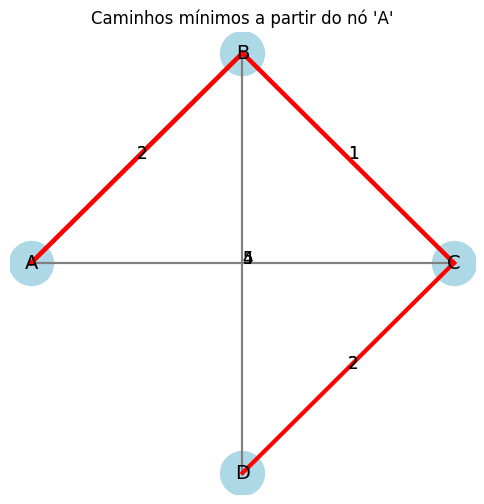

In [5]:
import heapq
from dataclasses import dataclass, field
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt

graph = {
    'A': [('B', 2), ('C', 5)],
    'B': [('A', 2), ('C', 1), ('D', 4)],
    'C': [('A', 5), ('B', 1), ('D', 2)],
    'D': [('B', 4), ('C', 2)]
}

@dataclass(order=True)
class PrioritizedItem:
    priority: int
    node: str = field(compare=False)

def dijkstra(graph: Dict[str, List[Tuple[str, int]]], start: str):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    visited = set()
    queue = [PrioritizedItem(0, start)]

    while queue:
        current = heapq.heappop(queue)
        current_node = current.node

        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph[current_node]:
            distance = distances[current_node] + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, PrioritizedItem(distance, neighbor))

    return distances, previous

def reconstruct_path(previous: Dict[str, str], start: str, end: str):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous[current]
    return path[::-1]

start_node = 'A'
distances, previous = dijkstra(graph, start_node)

print(f"Menores distâncias a partir do nó '{start_node}':")
for node, dist in distances.items():
    print(f" - Até {node}: {dist}")

print("\nCaminhos mínimos:")
for node in graph:
    if node != start_node:
        path = reconstruct_path(previous, start_node, node)
        print(f" - {start_node} → {node}: {' -> '.join(path)}")

positions = {'A': (0, 1), 'B': (1, 2), 'C': (2, 1), 'D': (1, 0)}

plt.figure(figsize=(6, 6))

for node, (x, y) in positions.items():
    plt.scatter(x, y, s=1000, color='lightblue')
    plt.text(x, y, node, fontsize=14, ha='center', va='center')

for node, edges in graph.items():
    x1, y1 = positions[node]
    for neighbor, weight in edges:
        x2, y2 = positions[neighbor]
        plt.plot([x1, x2], [y1, y2], color='gray')
        plt.text((x1+x2)/2, (y1+y2)/2, str(weight), fontsize=12, color='black')

for node in graph:
    if node != start_node:
        path = reconstruct_path(previous, start_node, node)
        for i in range(len(path)-1):
            x1, y1 = positions[path[i]]
            x2, y2 = positions[path[i+1]]
            plt.plot([x1, x2], [y1, y2], color='red', linewidth=3)

plt.title(f"Caminhos mínimos a partir do nó '{start_node}'")
plt.axis('off')
plt.show()

**Parte C — Árvores Binárias e Percursos (DFS em-ordem, pré-ordem e pós-ordem)**

> Você está desenvolvendo um sistema de recomendação que organiza produtos em uma árvore binária de busca (BST), conforme o preço. Cada nó é um produto e a travessia da árvore pode ser usada para: 1. Ordenar produtos (em-ordem); 2. Clonar a estrutura (pré-ordem); 3. Calcular totais ou liberar memória (pós-ordem);

**Atividades**

1. Crie uma BST com os valores: [50, 30, 70, 20, 40, 60, 80, 35, 45].

Implemente os percursos:

1. in_order(root)

2. pre_order(root)

3. post_order(root)

Teste se as saídas correspondem às travessias esperadas.

**Explique (Questões Discursivas):**

1. Em que situação cada tipo de percurso é mais indicado?

- In-Order: ideal para obter os elementos em ordem crescente.
- Pré-Order: útil para copiar ou serializar a estrutura da árvore.  
- Pós-Order: indicado para liberar memória ou calcular agregados de forma recursiva.


In [6]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def insert(root, value):
    if root is None:
        return Node(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

values = [50, 30, 70, 20, 40, 60, 80, 35, 45]
root = None
for v in values:
    root = insert(root, v)

def in_order(node):
    if node:
        in_order(node.left)
        print(node.value, end=" ")

def pre_order(node):
    if node:
        print(node.value, end=" ")
        pre_order(node.left)
        pre_order(node.right)

def post_order(node):
    if node:
        post_order(node.left)
        post_order(node.right)
        print(node.value, end=" ")

print("In-Order (esperado: ordenado):")
in_order(root)
print("\nPré-Order (esperado: raiz primeiro):")
pre_order(root)
print("\nPós-Order (esperado: raiz por último):")
post_order(root)

In-Order (esperado: ordenado):
20 30 50 
Pré-Order (esperado: raiz primeiro):
50 30 20 40 35 45 70 60 80 
Pós-Order (esperado: raiz por último):
20 35 45 40 30 60 80 70 50 

**Parte D — Reflexões (Respostas Curtas)**

Responda de forma argumentativa (5–10 linhas cada):

1. Quando não é vantajoso usar A*, mesmo tendo uma heurística?

Quando a heurística é fraca ou inconsistente, o A* pode se comportar como o Dijkstra, perdendo eficiência. Também não é vantajoso em grafos muito pequenos ou quando o custo de calcular a heurística supera os ganhos da busca.

2. Diferencie corretude e otimalidade nos algoritmos estudados.

Corretude garante que o algoritmo encontra um caminho válido até o destino. Otimalidade garante que esse caminho é o melhor possível (menor custo). Dijkstra e A* com heurísticas admissíveis são corretos e ótimos.

3. Dê um exemplo do mundo real onde cada tipo de percurso (em, pré, pós) é essencial.

- In-Order: mostrar produtos ordenados por preço em um e-commerce.  
- Pré-Order: salvar a estrutura de uma árvore de decisão.  
- Pós-Order: liberar memória de uma árvore ou calcular somatórios de subárvores.

4. Como heurísticas inconsistentes podem afetar o resultado do A*?

Heurísticas inconsistentes podem levar o A* a revisitar nós, aumentando o tempo de execução e podendo comprometer a otimalidade do caminho encontrado. Isso ocorre porque a estimativa de custo pode variar de forma não confiável

💬 Sugestão: use exemplos de mapas, jogos, sistemas de busca ou árvores sintáticas.

Insira suas respostas aqui

**Entrega**

Crie um repositório público chamado ia-grafos-seu-nome.

Envie para o repositório o arquivo ia_grafos_buscas.ipynb.

Submeta o link do repositório no ambiente da disciplina **Portal Digital Fametro.**.

**Integridade Acadêmica**

1. O trabalho é individual.
2. Discussões conceituais são permitidas, mas o código deve ser inteiramente autoral.
3. Verificações de similaridade serão aplicadas a todas as submissões.
4. Busque e estude os algoritmos através de pesquisas na internet, livros, slides da disciplina.